# Import relevant python modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

Read csv file

In [2]:
bike_data = pd.read_csv('day.csv')

Inspect the data 

In [3]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_data.shape

(730, 16)

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<b>null values not required to be taken care of. However columns need to be remaned with more meaningful names

In [6]:
bike_data.rename(columns = {'yr': 'year', 'mnth':'month', 'hum': 'humidity', 'cnt': 'count'}, inplace=True)
bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Convert catagorial columns from INT

NOTE: Not converting Year to object since later will have to make dummy out of it 

In [7]:
# Since month and year are already in year and month columns
bike_data.dteday = pd.to_datetime(bike_data.dteday, format="mixed").dt.day

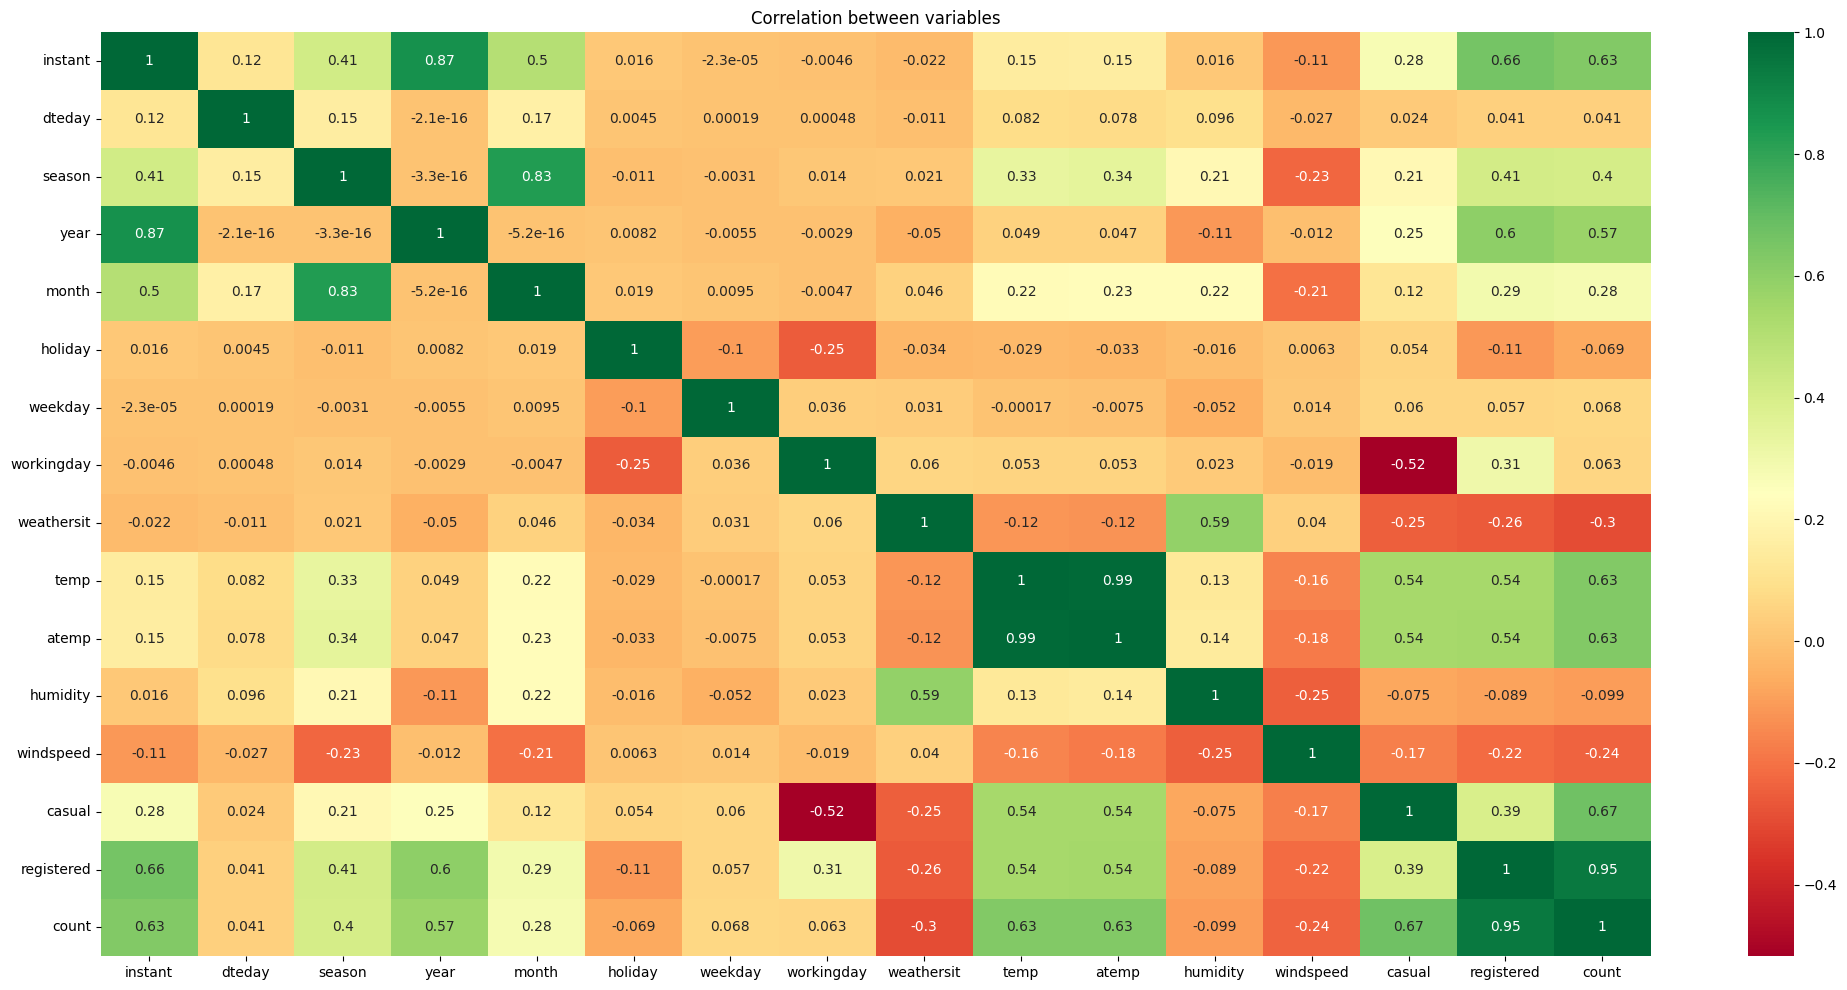

In [8]:
plt.figure(figsize=(25,12))
sns.heatmap(bike_data.corr(), cmap='RdYlGn', annot=True)
plt.title("Correlation between variables")
plt.show()

There is a high correlation between casual/registered and count, the business looks to be growing and was in good state before covid.
Season and month also have a connection(multicolenearity) can apply here.
year and counpositively correlated, On the other hand holiday that assumed to have a positive relation turns out to be not the case.
People might be using to commute to office looking at the positive correlation in count and working day.

In [9]:
bike_data['season'] = bike_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_data['weathersit'] = bike_data.weathersit.map({1: 'clear', 2: 'mist_cloudy', 3: 'light_snow', 4: 'heavy_rain'})

In [10]:
bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,spring,0,1,0,6,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,spring,0,1,0,0,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<b>Dropping Instant, casual and registered since instant is increment number and do not have any value in the analysis. Casual and registered are in count column already.

In [11]:
bike_data = bike_data.drop(['instant', 'casual', 'registered'], axis = 1)

Workingday and holiday also looks redundant will see later which to drop. Keeping it for now.

Visual chart for Continous data

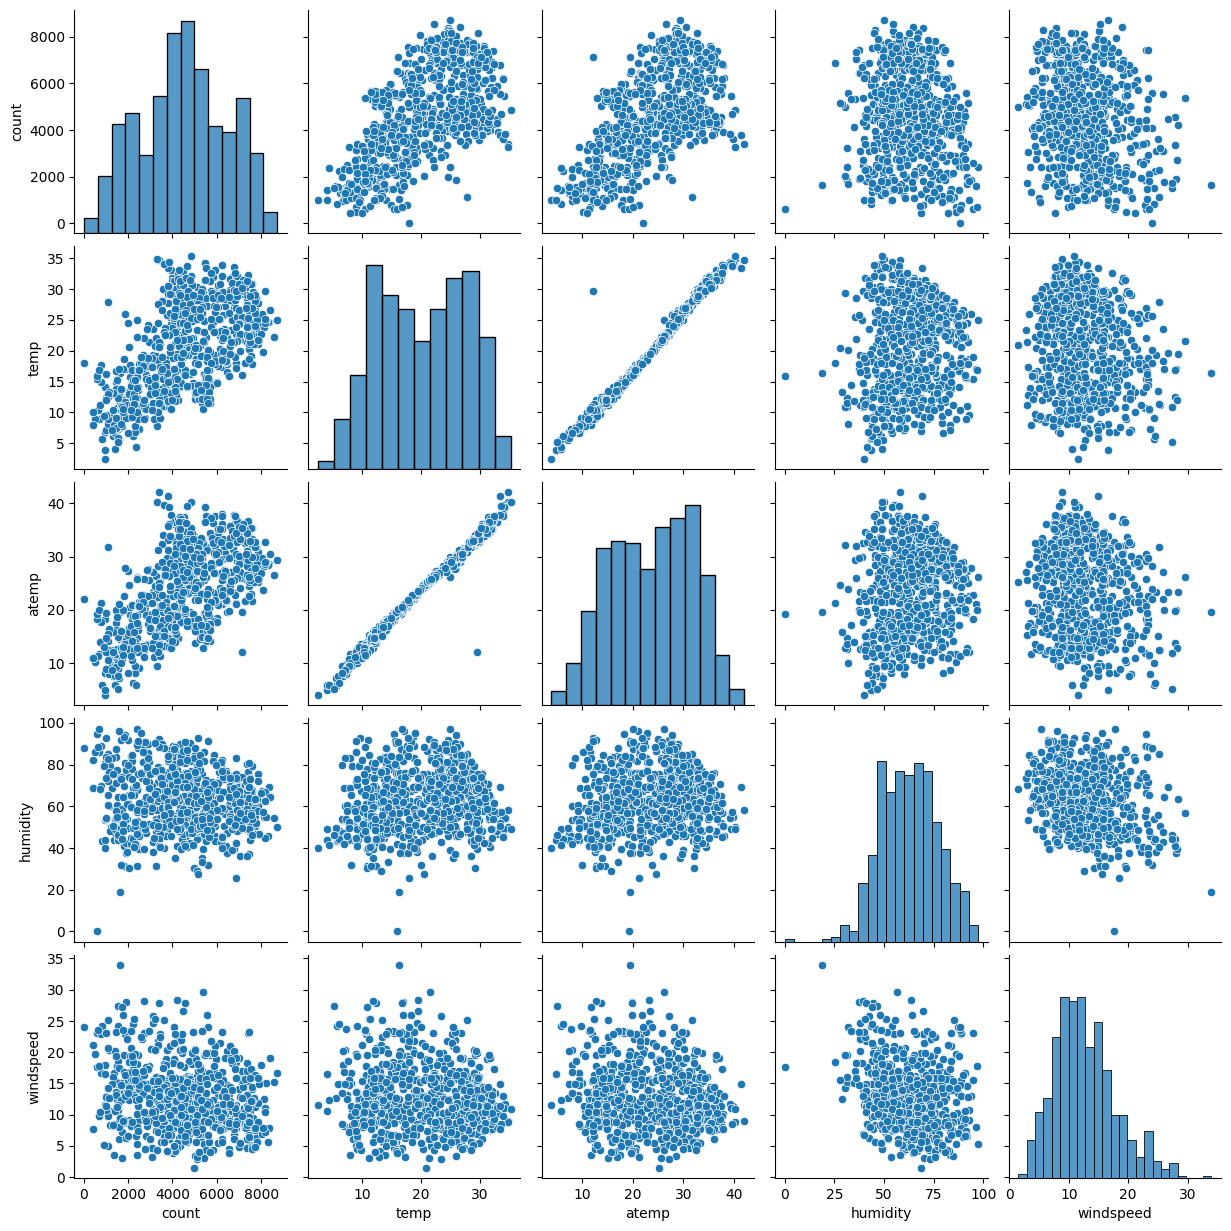

In [12]:
sns.pairplot(data=bike_data, vars=(['count', 'temp', 'atemp', 'humidity', 'windspeed']))
plt.show()

count and temp, atemp loog to have a high correlation visually, rest all correlations are a little lesser strong. 

Visual for categorical data

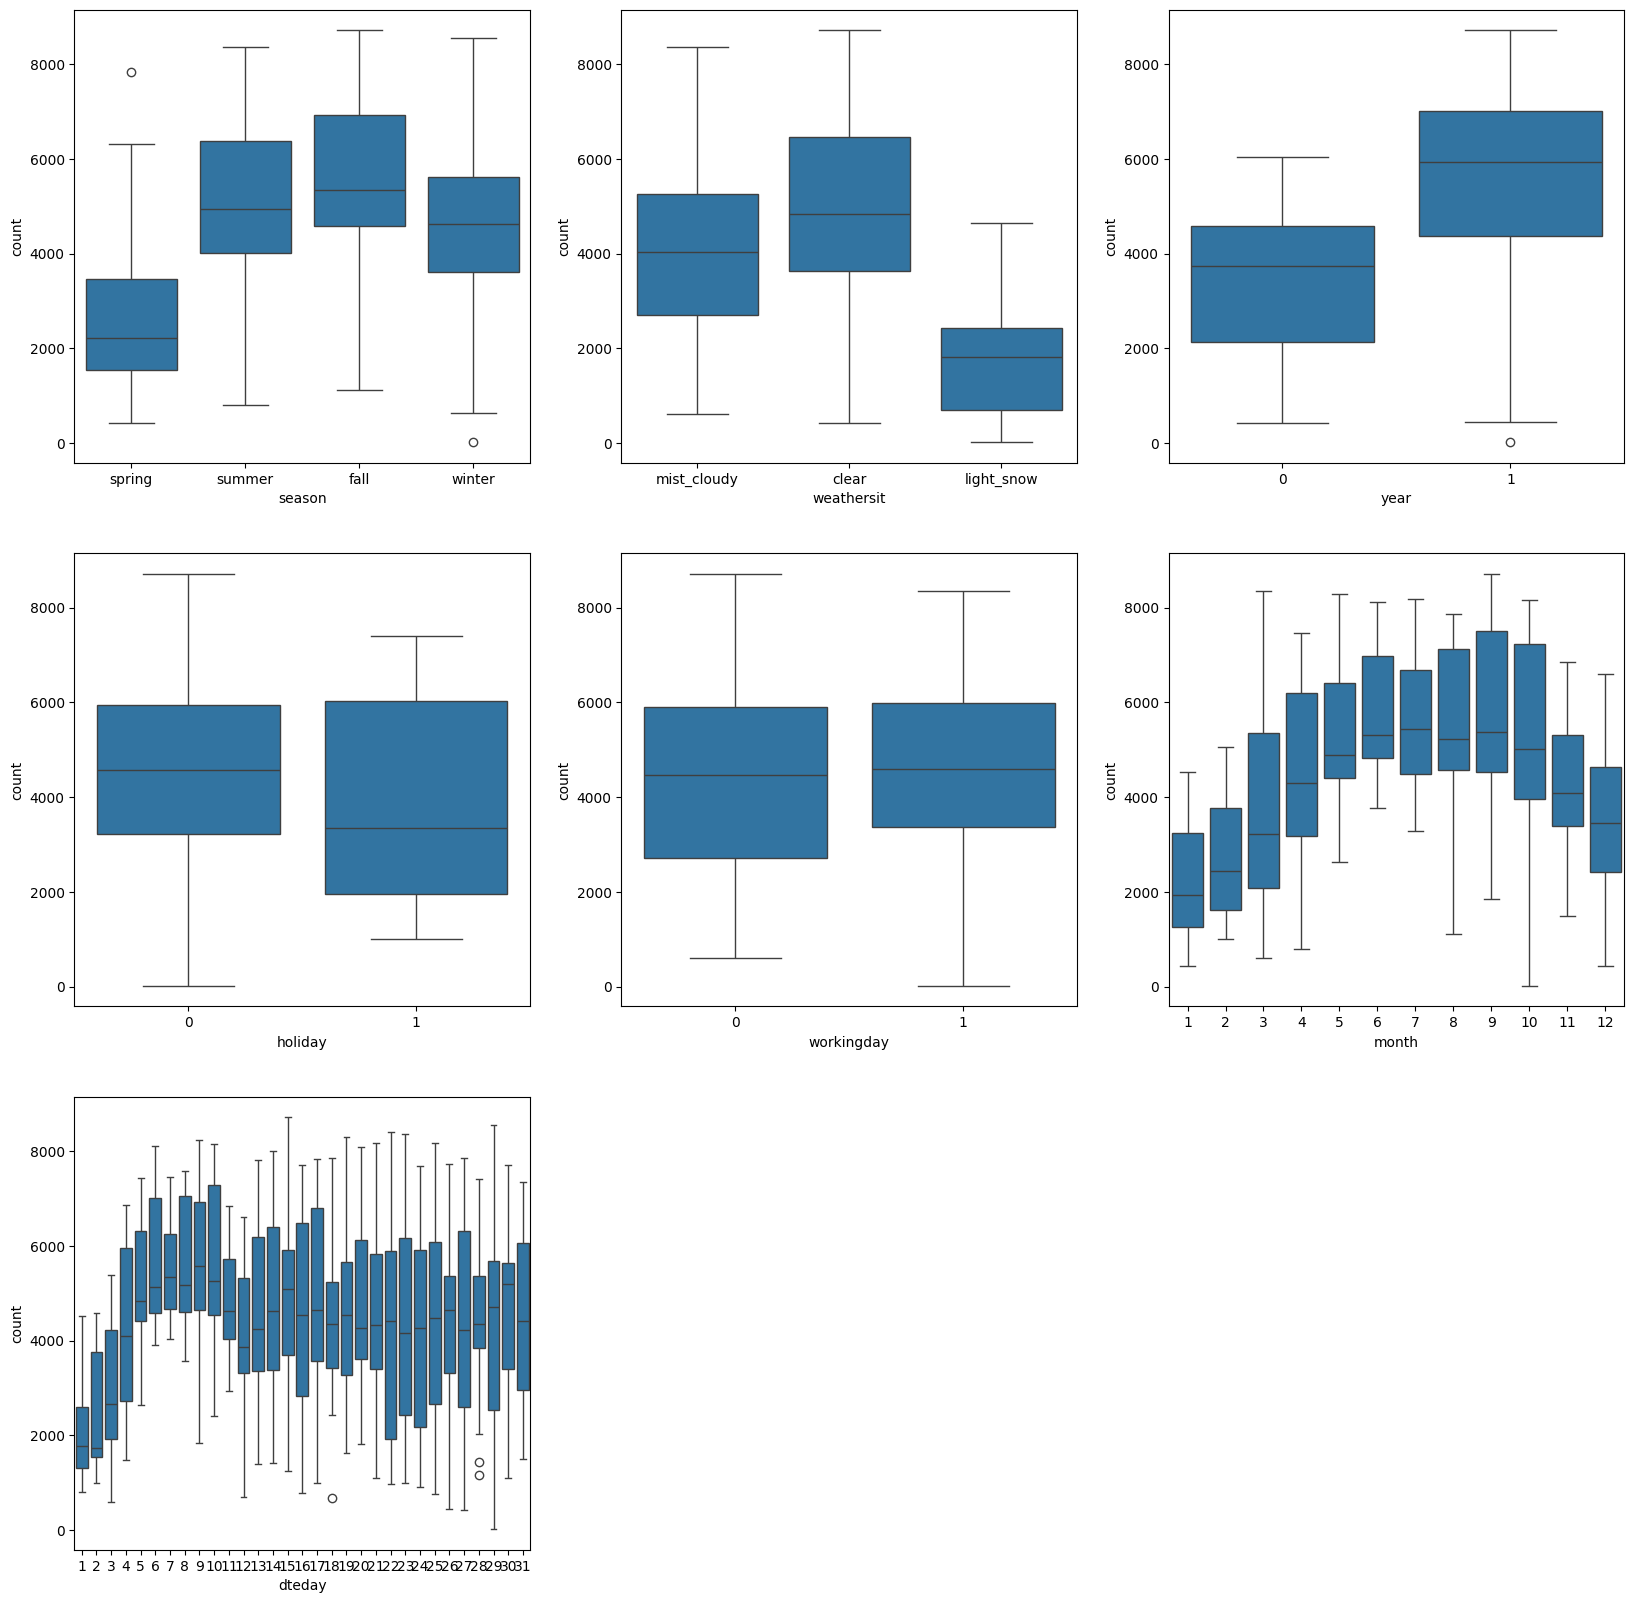

In [13]:
plt.figure(figsize= (20,20))
plt.subplot(3,3,1)
sns.boxplot(x="season", y="count", data=bike_data)
plt.subplot(3,3,2)
sns.boxplot(x="weathersit", y="count", data=bike_data)
plt.subplot(3,3,3)
sns.boxplot(x="year", y="count", data=bike_data)
plt.subplot(3,3,4)
sns.boxplot(x="holiday", y="count", data=bike_data)
plt.subplot(3,3,5)
sns.boxplot(x="workingday", y="count", data=bike_data)
plt.subplot(3,3,6)
sns.boxplot(x="month", y="count", data=bike_data)
plt.subplot(3,3,7)
sns.boxplot(x="dteday", y="count", data=bike_data)
plt.show()


Weather and seasons have a pattern. And Info in season and month look to have same info in them thus one can be dropped

Interesting observation: Counts are consistently lower in the beginning of a month days compared to latter part.

In [14]:
bike_data.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,spring,0,1,0,6,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,spring,0,1,0,0,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


Convert catagorial columns to dummy.

In [15]:
weathersit = pd.get_dummies(bike_data.weathersit, drop_first=True, dtype=int)
seasons = pd.get_dummies(bike_data.season, drop_first=True, dtype=int)

In [16]:
bike_data=pd.concat([bike_data, seasons, weathersit], axis = 1)
bike_data.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,spring,summer,winter,light_snow,mist_cloudy
0,1,spring,0,1,0,6,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,1,spring,0,1,0,0,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,1,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,1,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,1,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


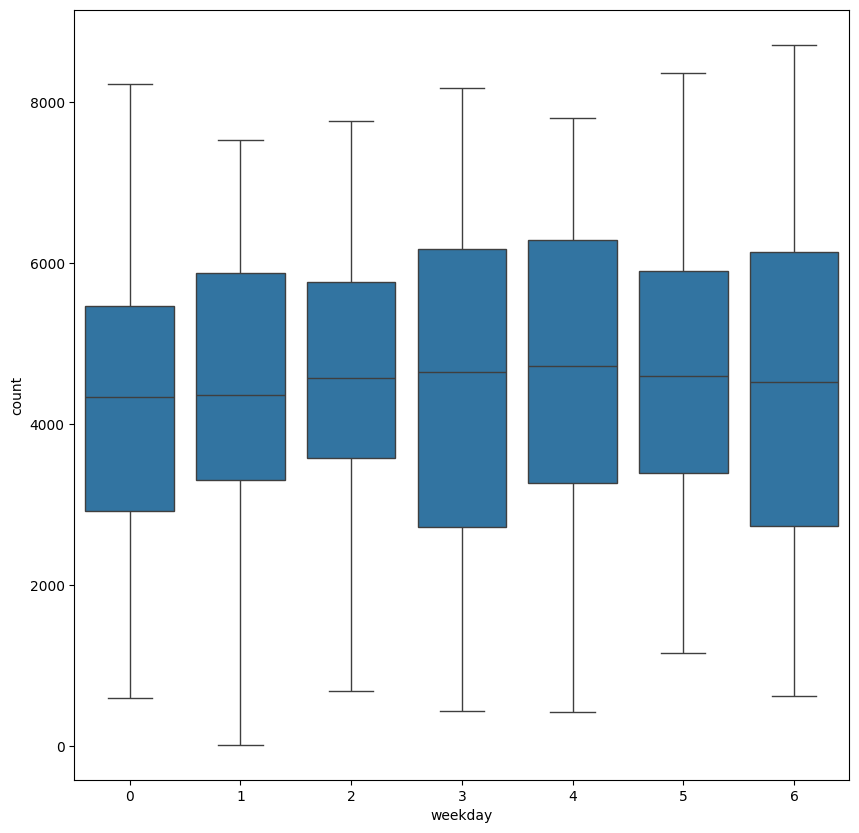

In [17]:
plt.figure(figsize= (10,10))
sns.boxplot(x="weekday", y="count", data=bike_data)
plt.show()

Weekday do not look to have any pattern usage patterns are almost same across weeks

In [18]:
bike_data = bike_data.drop(['month', 'weathersit', 'season', 'weekday', 'dteday'], axis=1)

In [19]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   atemp        730 non-null    float64
 5   humidity     730 non-null    float64
 6   windspeed    730 non-null    float64
 7   count        730 non-null    int64  
 8   spring       730 non-null    int64  
 9   summer       730 non-null    int64  
 10  winter       730 non-null    int64  
 11  light_snow   730 non-null    int64  
 12  mist_cloudy  730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


Modelling starts

In [20]:
df_train, df_test = train_test_split(bike_data, train_size=.7, random_state = 100)

In [21]:
print(df_train.shape, df_test.shape)

(510, 13) (220, 13)


Normalize numeric columns

In [22]:
num = ['temp', 'atemp', 'humidity','windspeed','count']
scaler = MinMaxScaler()
df_train[num] = scaler.fit_transform(df_train[num])


In [23]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,winter,light_snow,mist_cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1


Since have dropped columns form the data set already based on intuition, using all available columns for model building. May drop some later.  

In [24]:
y_train = df_train.pop('count')
X_train = df_train

In [25]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
vif = pd.DataFrame()
vif['feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     199.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.27e-181
Time:                        08:55:03   Log-Likelihood:                 487.84
No. Observations:                 510   AIC:                            -949.7
Df Residuals:                     497   BIC:                            -894.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2811      0.036      7.782      

Temp and atemp(felt temp) both have very high VIF, with atemp having very high p value. 
Removing atemp as it is a mix of humidity and temp.

In [26]:
X_train = X_train.drop('atemp', axis = 1 )
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
vif = pd.DataFrame()
vif['feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.22e-182
Time:                        08:55:03   Log-Likelihood:                 487.81
No. Observations:                 510   AIC:                            -951.6
Df Residuals:                     498   BIC:                            -900.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2809      0.036      7.786      

Taking our humidity also since its >5

In [27]:
X_train = X_train.drop('humidity', axis = 1 )
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
vif = pd.DataFrame()
vif['feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          7.72e-181
Time:                        08:55:03   Log-Likelihood:                 481.33
No. Observations:                 510   AIC:                            -940.7
Df Residuals:                     499   BIC:                            -894.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2100      0.031      6.883      

Model looks good at this point. Lets check how it performs in test data.

Test dataset need to be transformed since we did it on the train dataset.

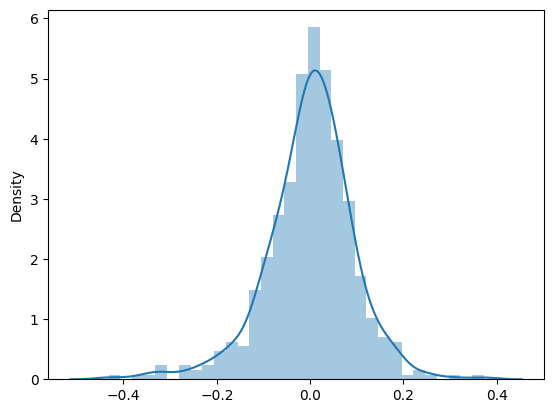

In [28]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

Residual has a range of -.2 to +.2 with majority of data point under the bell curve.

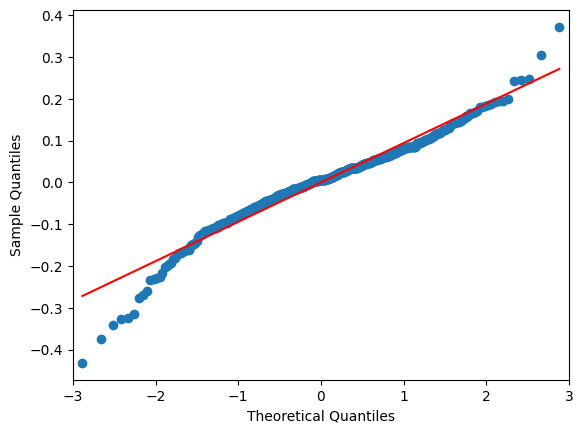

In [29]:
sm.qqplot(res, line='s')
plt.show()

In [30]:
df_test[num] = scaler.transform(df_test[num])

In [31]:
y_test = df_test.pop('count')
X_test = df_test

In [32]:
X_test = X_test.drop(['atemp', 'humidity'], axis =1 )
X_test_sm = sm.add_constant(X_test)

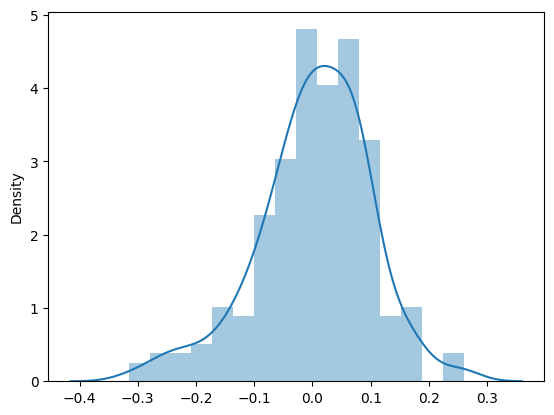

In [33]:
y_test_pred = lr_model.predict(X_test_sm)
res = y_test - y_test_pred
sns.distplot(res)
plt.show()

Prediction accuracy on test set is almost similar to the train data.

In [34]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8014598233673547

Prediction accuracy on test data is almost close to R2 in train.

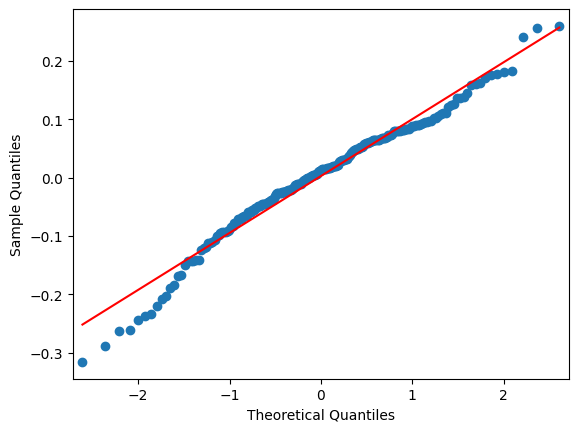

In [35]:
#res variable over written with test residuals
sm.qqplot(res, line='s')
plt.show()

Q-q plot on the test data looks almost same to the that of train data. However its not completely normal distributed. but is aligned to the 45 degree line from -1 to 1.